In [15]:
import tensorflow as tf
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np
import keras


In [16]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.cifar10.load_data()


In [17]:
print('Training images:{}'.format(x_train.shape))
print('Testing Images:{}'.format(x_test.shape))


Training images:(50000, 32, 32, 3)
Testing Images:(10000, 32, 32, 3)


In [18]:
print(y_train[0])

[6]


In [19]:
print(x_train[0].shape)

(32, 32, 3)


In [20]:
print(x_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


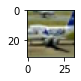

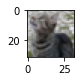

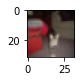

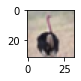

In [21]:
for i in range(332,336):
  plt.subplot(120+1+i)
  img=x_train[i]
  plt.imshow(img)
  plt.show()

In [22]:
x_train=x_train.reshape(x_train.shape[0],32,32,3)
x_test=x_test.reshape(x_test.shape[0],32,32,3)
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
n_classes=10

print('Shape before one hot encoding: ',y_train.shape)
y_train=np_utils.to_categorical(y_train,n_classes)
y_test=np_utils.to_categorical(y_test,n_classes)
print('Shape after one hot encoding: ',y_train.shape)

Shape before one hot encoding:  (50000, 1)
Shape after one hot encoding:  (50000, 10)


In [24]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Conv2D,MaxPool2D,Flatten


model=Sequential()
#Concolutional layers
model.add(Conv2D(50,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu',input_shape=(32,32,3)))

model.add(Conv2D(75,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Hidden layer
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250,activation='relu'))
model.add(Dropout(0.3))

#Output layer
model.add(Dense(10,activation='softmax'))

#Compiling
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

#Training the model
model.fit(x_train,y_train,batch_size=128,epochs=10,validation_data=(x_test,y_test))




Epoch 1/10
391/391 [==============================] - 537s 1s/step - loss: 1.5845 - accuracy: 0.4177 - val_loss: 1.2008 - val_accuracy: 0.5734
Epoch 2/10
391/391 [==============================] - 545s 1s/step - loss: 1.1386 - accuracy: 0.5946 - val_loss: 0.9697 - val_accuracy: 0.6665
Epoch 3/10
391/391 [==============================] - 548s 1s/step - loss: 0.9383 - accuracy: 0.6692 - val_loss: 0.8110 - val_accuracy: 0.7119
Epoch 4/10
391/391 [==============================] - 539s 1s/step - loss: 0.8252 - accuracy: 0.7097 - val_loss: 0.7601 - val_accuracy: 0.7350
Epoch 5/10
391/391 [==============================] - 506s 1s/step - loss: 0.7444 - accuracy: 0.7398 - val_loss: 0.7242 - val_accuracy: 0.7490
Epoch 6/10
391/391 [==============================] - 463s 1s/step - loss: 0.6736 - accuracy: 0.7642 - val_loss: 0.6768 - val_accuracy: 0.7643
Epoch 7/10
391/391 [==============================] - 464s 1s/step - loss: 0.6144 - accuracy: 0.7853 - val_loss: 0.6722 - val_accuracy: 0.7700

In [25]:
classes = range(0,10)
names=['airplane','automobile','bird','cat','deer','frog','horse','ship','truck']

class_labels=dict(zip(classes,names))

batch=x_test[100:109]
labels=np.argmax(y_test[100:109],axis=-1)

#Make predictions
predictions=model.predict(batch,verbose=1)
print(predictions)

1/1 [==============================] - 0s 113ms/step
[[7.1138609e-05 8.0549780e-06 3.1801280e-02 1.4959672e-02 6.6383648e-01
  1.3928473e-01 9.9686161e-04 1.4896636e-01 4.7004280e-05 2.8408302e-05]
 [1.9533605e-04 3.7436192e-05 1.2526013e-01 1.6818939e-01 5.2621149e-02
  5.3572839e-01 6.2330410e-02 5.4694995e-02 6.9397228e-04 2.4872244e-04]
 [7.4817644e-06 7.3509846e-06 8.8458695e-03 1.3589179e-02 1.8522129e-04
  1.9949013e-03 9.7524661e-01 1.9572981e-05 9.9980592e-05 3.8034743e-06]
 [7.3439134e-07 4.7676869e-07 2.5921330e-04 9.2114121e-01 5.9540418e-04
  2.2190157e-02 5.5806346e-02 3.2184848e-06 1.2228347e-06 2.1118635e-06]
 [1.2354296e-05 9.9195236e-01 2.1807853e-08 2.1717540e-07 1.4601388e-08
  6.5997675e-08 1.0433714e-07 3.3356489e-08 5.5039392e-05 7.9797404e-03]
 [1.2098857e-05 9.9135584e-01 1.8565472e-06 6.6182051e-06 1.2933378e-06
  1.8273249e-06 2.2132574e-06 2.5856593e-07 2.5831037e-03 6.0350145e-03]
 [3.0700171e-02 7.6038268e-04 7.5323172e-02 6.3198632e-01 1.8499270e-02
  1.3

In [26]:
for image in predictions:
  print(np.sum(image))

1.0
1.0
0.99999994
1.0000001
0.99999994
1.0000001
0.9999999
0.9999998
0.99999994


In [27]:
class_result=np.argmax(predictions,axis=-1)
print(class_result)

[4 5 6 3 1 1 3 6 8]


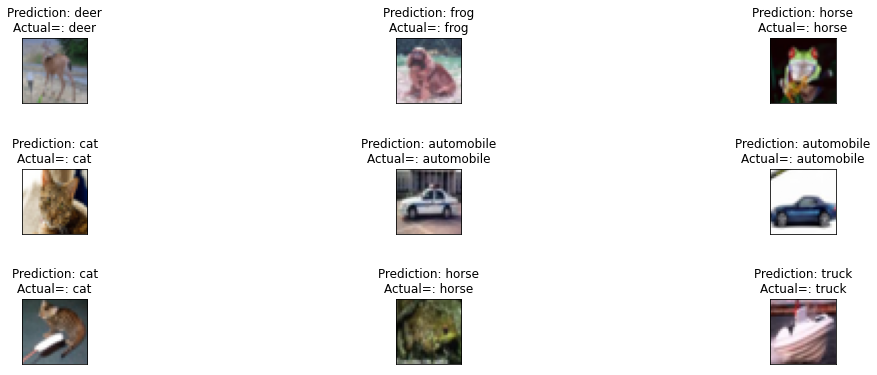

In [28]:
#Final object detection

fig,axs=plt.subplots(3,3,figsize=(19,6))
fig.subplots_adjust(hspace=1)
axs=axs.flatten()

for i,img in enumerate(batch):
  for key ,value in class_labels.items():
    if class_result[i]==key:
      title='Prediction: {}\nActual=: {}'.format(class_labels[key],class_labels[labels[i]])
      axs[i].set_title(title)
      axs[i].axes.get_xaxis().set_visible(False)
      axs[i].axes.get_yaxis().set_visible(False)

  # Plot the image
  axs[i].imshow(img)
#Show plot
plt.show()
